In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./combined_csv_light.csv")
data = data.fillna(0)
data.shape
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,2020,3,9,19,6,2020-09-19,AS,14747,SEA,11292,...,156.0,125.0,1024.0,5,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,9,19,6,2020-09-19,AS,14747,SEA,10397,...,272.0,256.0,2182.0,9,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,3,9,19,6,2020-09-19,AS,10299,ANC,14747,...,194.0,175.0,1448.0,6,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,3,9,19,6,2020-09-19,AS,10917,CDB,10165,...,0.0,0.0,616.0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,3,9,19,6,2020-09-19,AS,14747,SEA,12523,...,155.0,122.0,909.0,4,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data = data.drop(['YEAR','QUARTER', 'DAY_OF_MONTH','FL_DATE','ORIGIN','DEST','Unnamed: 32', 'OP_UNIQUE_CARRIER', 'CANCELLATION_CODE','DEP_DELAY_NEW','DEP_DEL15','DEP_DELAY_GROUP','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN','ACTUAL_ELAPSED_TIME','AIR_TIME','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1)

In [4]:
data.head()

,MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,9,6,14747,11292,0.0,0.0,-1.0,150.0,1024.0,5
1,9,6,14747,10397,0.0,0.0,-1.0,281.0,2182.0,9
2,9,6,10299,14747,0.0,0.0,-1.0,195.0,1448.0,6
3,9,6,10917,10165,0.0,0.0,0.0,85.0,616.0,3
4,9,6,14747,12523,0.0,0.0,-1.0,150.0,909.0,4


In [5]:
data = data[data['ARR_DEL15']==1]
data.shape
data.dropna(axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.columns

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'CRS_ELAPSED_TIME',
       'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

In [6]:
len(data)

137557

In [7]:
x = np.asarray(data.drop('ARR_DELAY_NEW', axis = 1), dtype=np.float32)
y = np.asarray(data['ARR_DELAY_NEW'], dtype=np.float32)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
nn = MLPRegressor(
    hidden_layer_sizes=(16,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [10]:
print(X_test.shape)
print(y_test.shape)

(34390, 9)
(34390,)


In [11]:
X_test = X_test[0:10000,:]


In [12]:
y_test = y_test[0:X_test.shape[0]]

In [13]:
nn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16,), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=9, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [14]:
y_pred = nn.predict(X_train)
print(mean_absolute_error(y_pred, y_train))
r2_score(y_pred, y_train)

42.47179729872788


-0.09017003511626998

In [15]:
y_pred = nn.predict(X_test)
print(mean_absolute_error(y_pred, y_test))
r2_score(y_pred, y_test)

42.653791949285726


-0.16491212049654846

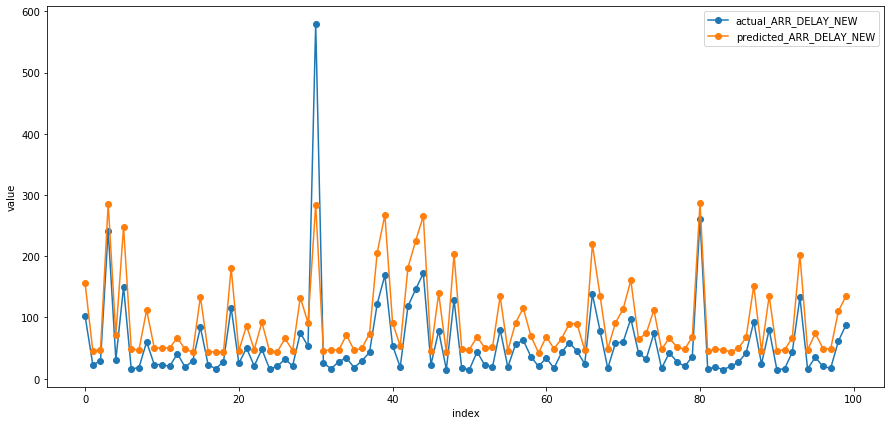

In [16]:
x = np.arange(len(y_test[:100]))

plt.figure(figsize=(15, 7))
plt.plot(x, y_test[:100], '-o', label='actual_ARR_DELAY_NEW')
plt.plot(x, y_pred[:100], '-o', label='predicted_ARR_DELAY_NEW')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()